In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils

import json

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

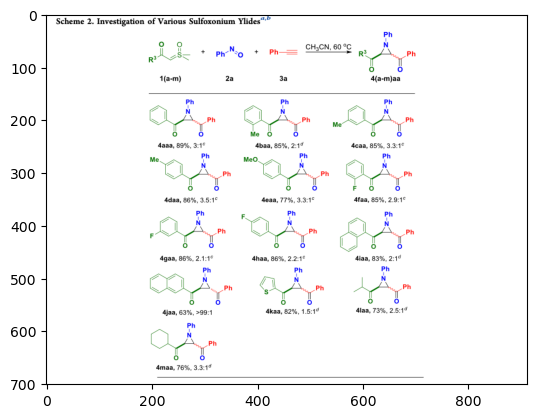

In [3]:
file_name = 'acs.joc.3c00062 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

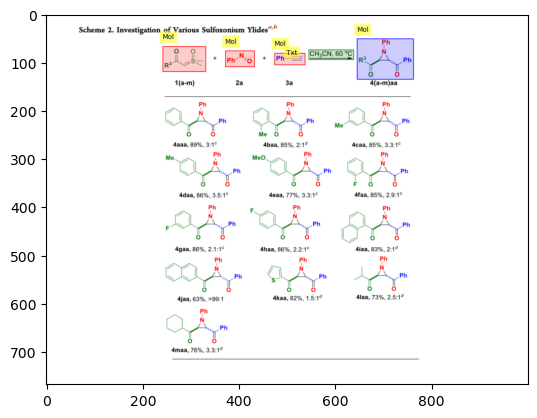

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'[3*]C(=O)C=S(C)(C)=O': ['I(a-m)'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1': ['899, 3;15', '4aaa,'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2cccc(F)c2)N1c1ccccc1': ['86%, 2,1.18', '4gaa,'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)C2CCCCC2)N1c1ccccc1': ['4maa, 76%, 3.3;18'], 'Cc1ccc(C(=O)[C@@H]2[C@@H](C(=O)c3ccccc3)N2c2ccccc2)cc1': ['4daa, 86% , 3.5.18'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccc3ccccc3c2)N1c1ccccc1': ['4jaa, 63%, >99.1'], 'O=Nc1ccccc1': ['2a'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccc(F)cc2)N1c1ccccc1': ['4haa, 86% , 2.2:18'], 'Cc1ccccc1C(=O)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1': ['Abaa, 85%, 2:18'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccc(O[Ne])cc2)N1c1ccccc1': ['77% , 3.3.1C', '4eaa,'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2cccs2)N1c1ccccc1': ['4kaa, 82%, 1.5.18'], 'C#Cc1ccccc1': ['3a'], '*c1cccc(C(=O)[C@@H]2[C@@H](C(=O)c3ccccc3)N2c2ccccc2)c1': ['4caa, 85%, 3.3.1*'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2cccc3ccccc23)N1c1ccccc1': ['4iaa, 83% ,', '2.19'], 'O=C(c1ccccc1)[C@@H

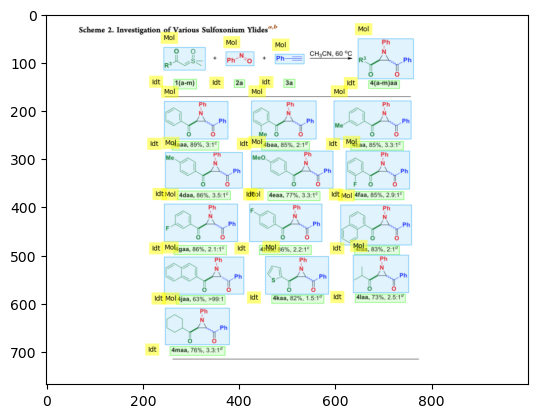

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

[3*]C(=O)C=S(C)(C)=O


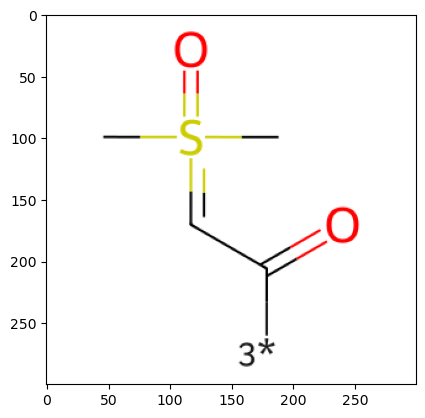

O=Nc1ccccc1


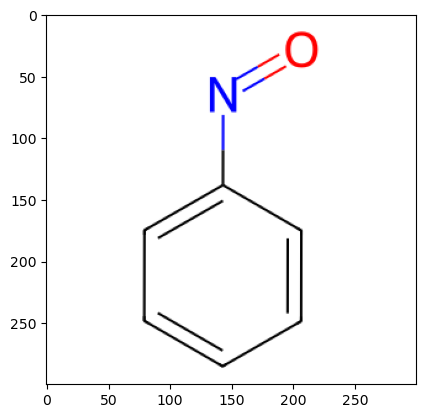

C#Cc1ccccc1


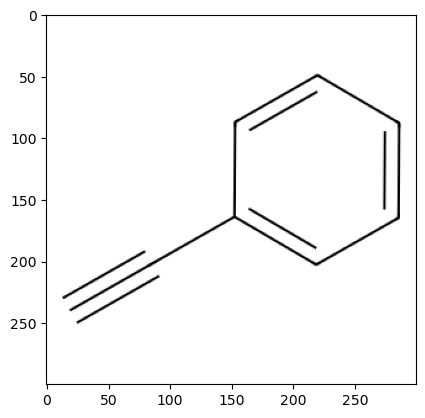

[3*]C(=O)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1


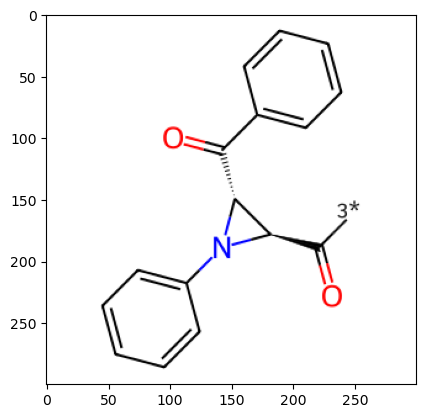

In [6]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [7]:
backed_out = utils.backout(results, coref_results)

these are the predicted reactants corresponding the product with label 4aaa,
CS(C)(=O)=CC(=O)c1ccccc1


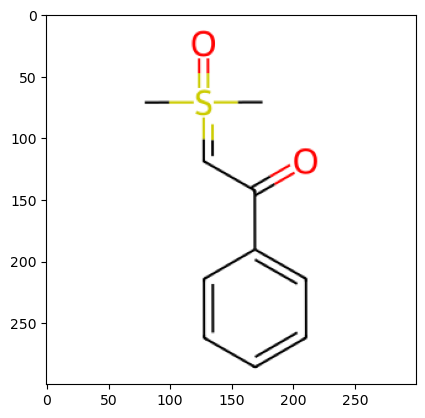

O=Nc1ccccc1


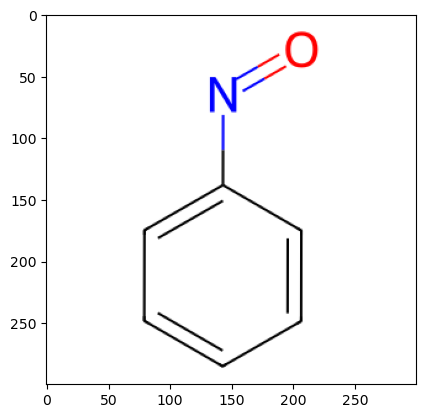

C#Cc1ccccc1


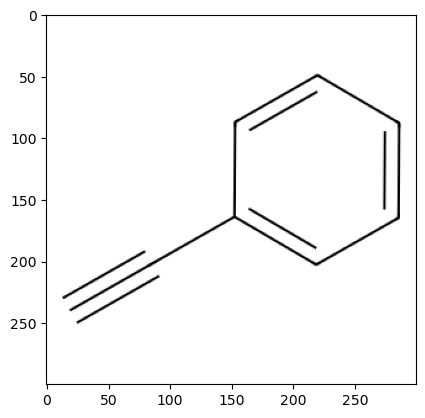

these are the predicted reactants corresponding the product with label 4gaa,
CS(C)(=O)=CC(=O)c1cccc(F)c1


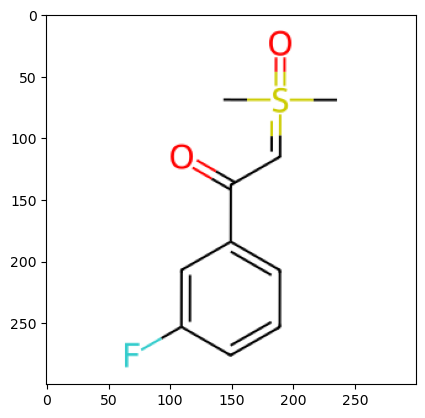

O=Nc1ccccc1


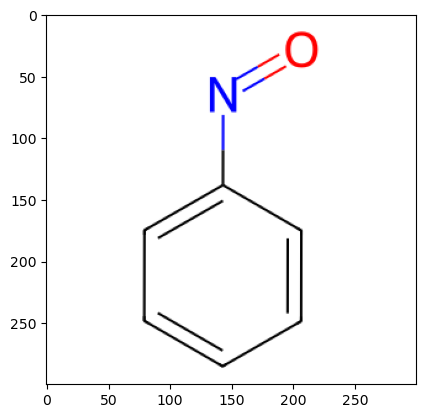

C#Cc1ccccc1


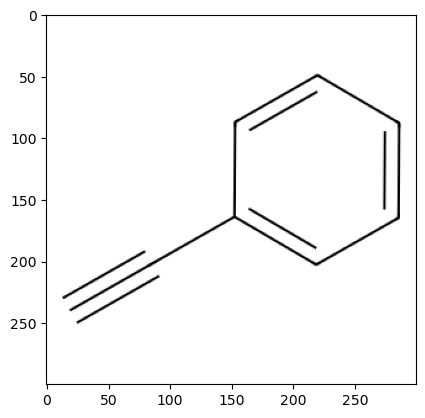

these are the predicted reactants corresponding the product with label 4maa, 76%, 3.3;18
CS(C)(=O)=CC(=O)C1CCCCC1


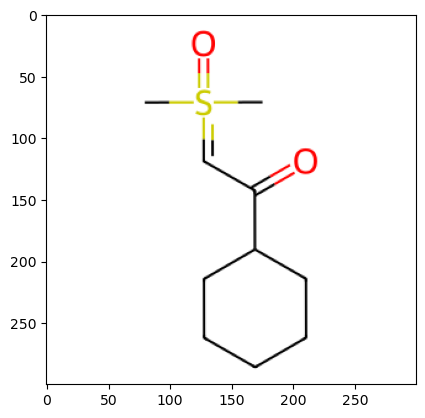

O=Nc1ccccc1


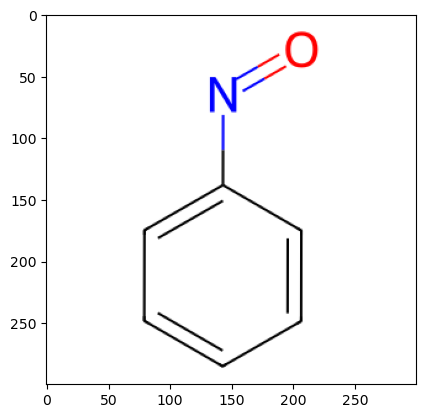

C#Cc1ccccc1


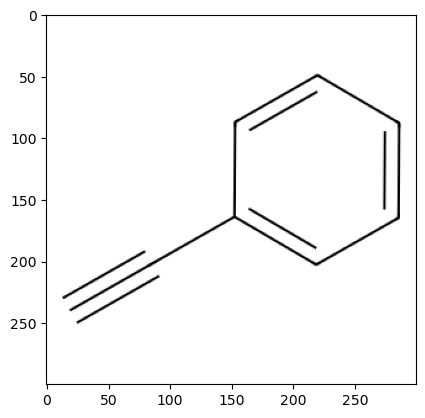

these are the predicted reactants corresponding the product with label 4daa, 86% , 3.5.18
Cc1ccc(C(=O)C=S(C)(C)=O)cc1


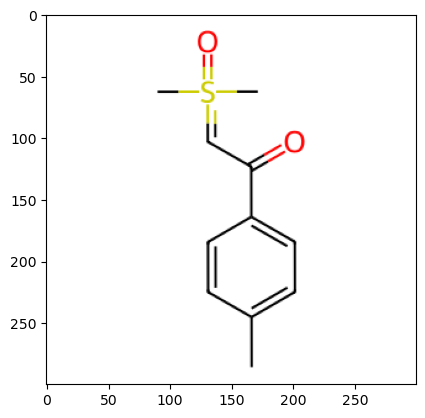

O=Nc1ccccc1


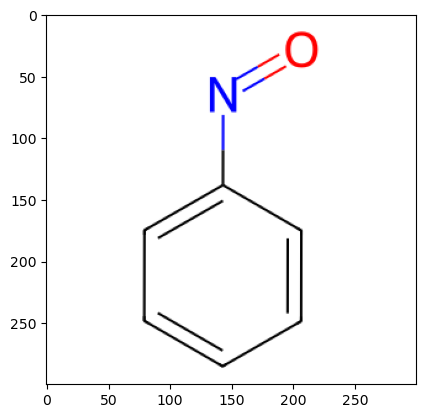

C#Cc1ccccc1


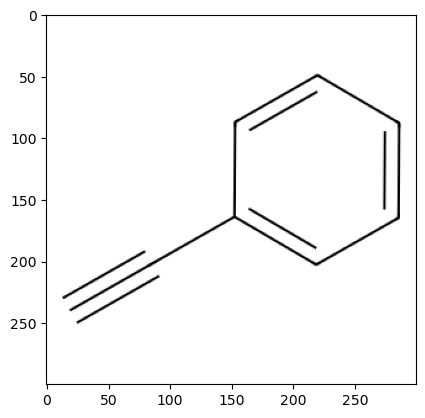

these are the predicted reactants corresponding the product with label 4jaa, 63%, >99.1
CS(C)(=O)=CC(=O)c1ccc2ccccc2c1


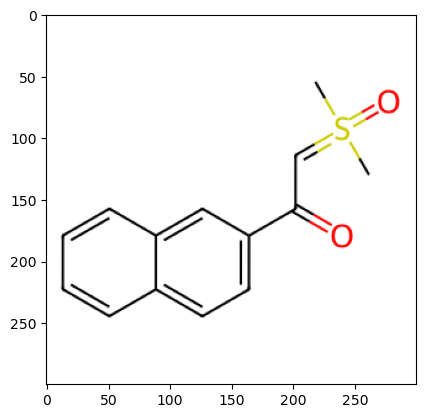

O=Nc1ccccc1


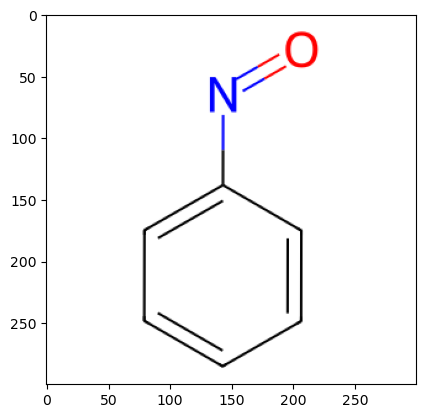

C#Cc1ccccc1


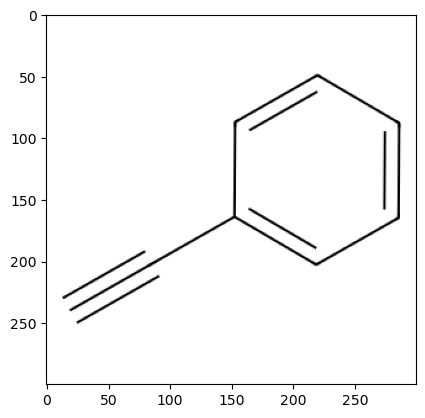

these are the predicted reactants corresponding the product with label 4haa, 86% , 2.2:18
CS(C)(=O)=CC(=O)c1ccc(F)cc1


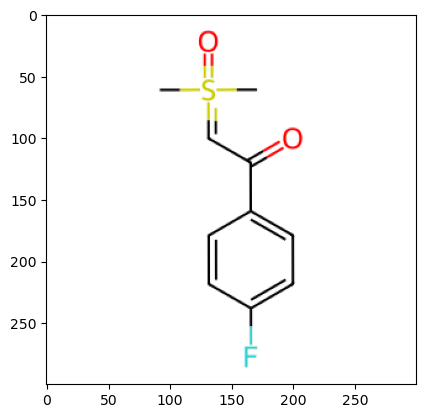

O=Nc1ccccc1


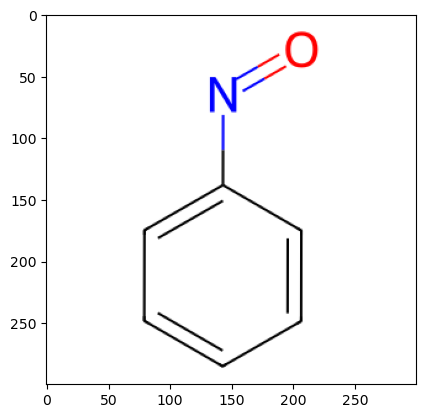

C#Cc1ccccc1


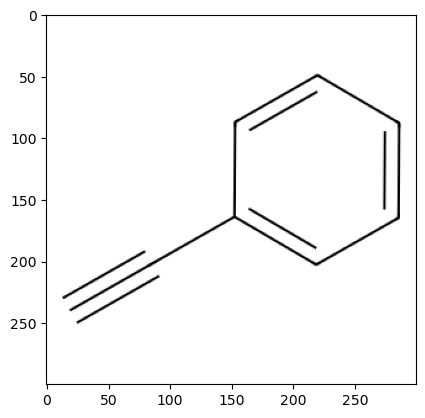

these are the predicted reactants corresponding the product with label 4eaa,
CS(C)(=O)=CC(=O)c1ccc(O[Ne])cc1


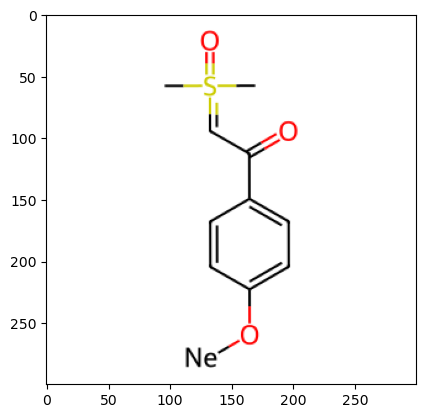

O=Nc1ccccc1


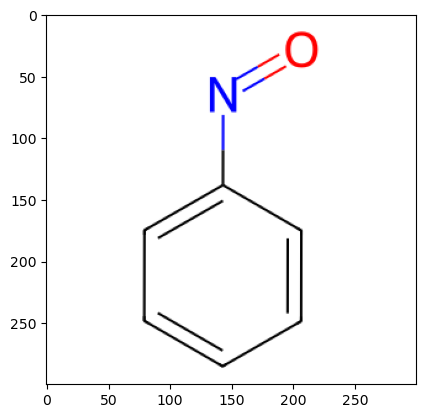

C#Cc1ccccc1


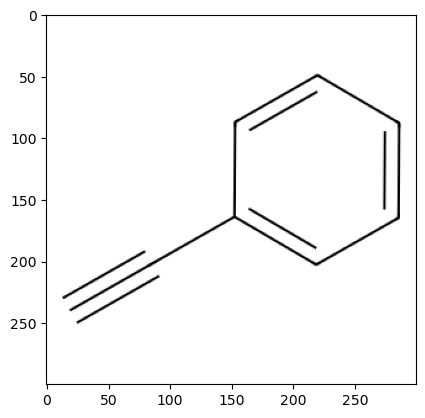

these are the predicted reactants corresponding the product with label 4kaa, 82%, 1.5.18
CS(C)(=O)=CC(=O)c1cccs1


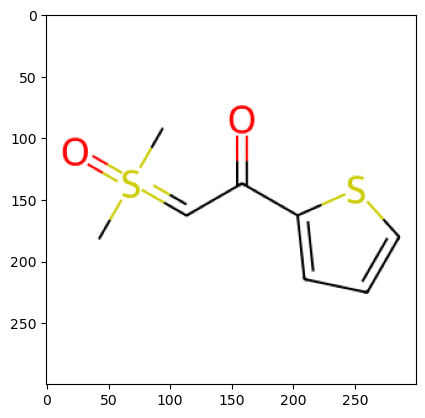

O=Nc1ccccc1


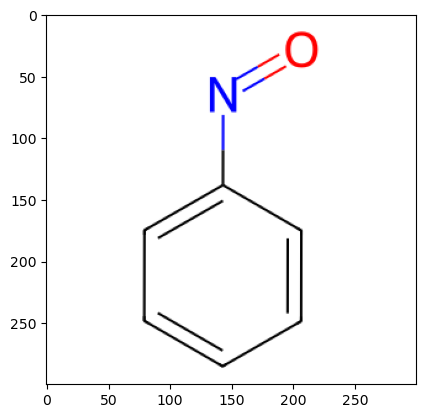

C#Cc1ccccc1


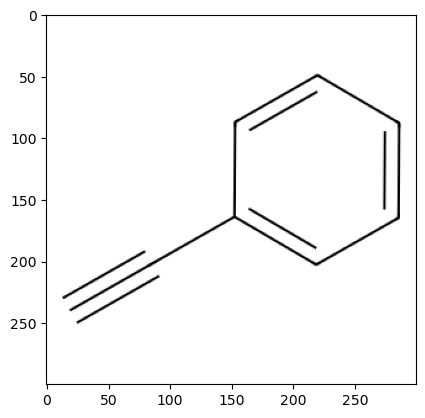

these are the predicted reactants corresponding the product with label 4caa, 85%, 3.3.1*
*c1cccc(C(=O)C=S(C)(C)=O)c1


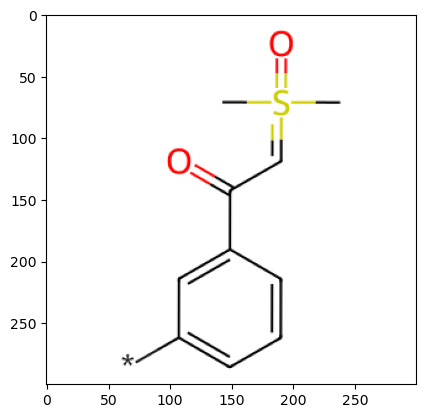

O=Nc1ccccc1


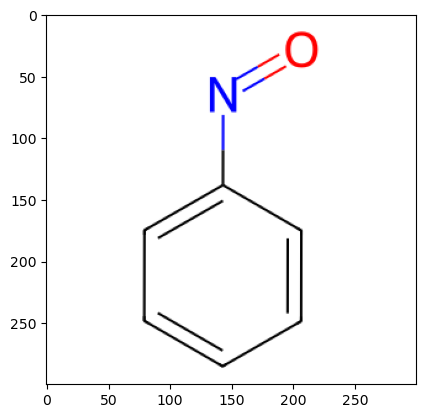

C#Cc1ccccc1


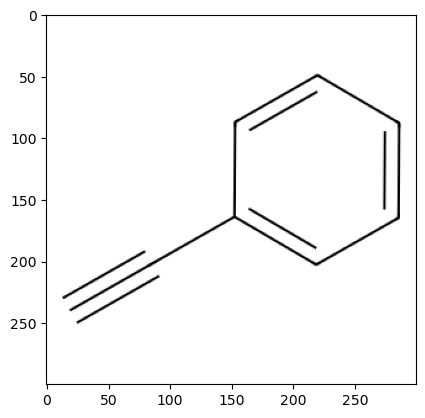

these are the predicted reactants corresponding the product with label 4iaa, 83% ,
CS(C)(=O)=CC(=O)c1cccc2ccccc12


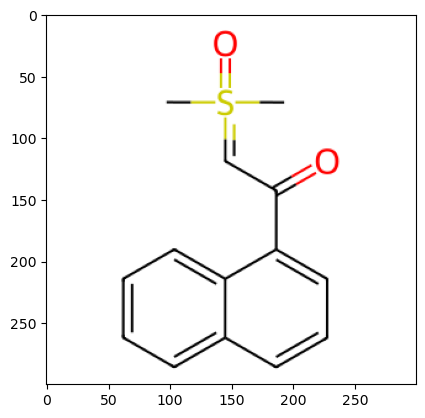

O=Nc1ccccc1


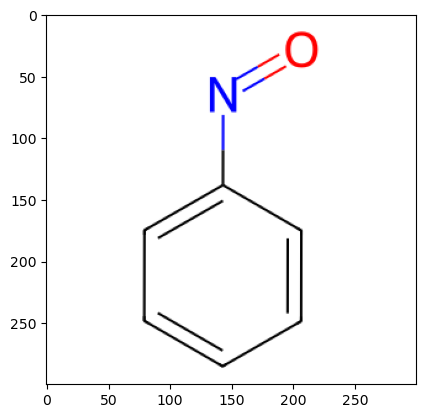

C#Cc1ccccc1


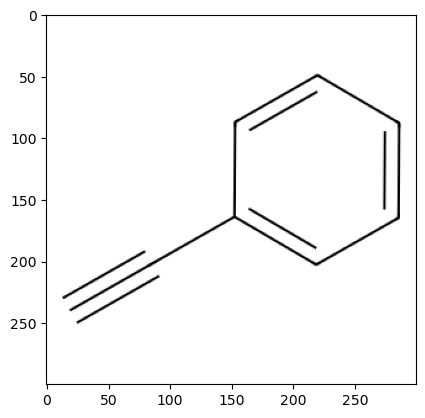

these are the predicted reactants corresponding the product with label 4faa,
CS(C)(=O)=CC(=O)c1ccccc1F


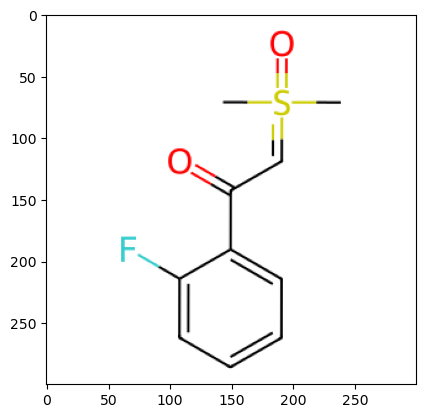

O=Nc1ccccc1


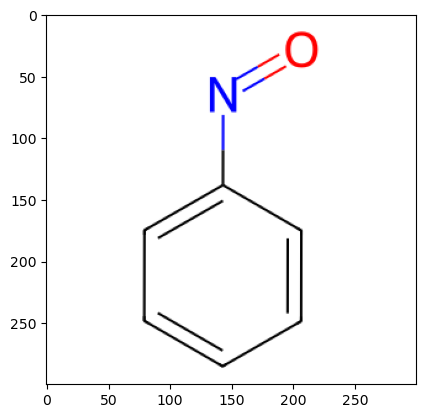

C#Cc1ccccc1


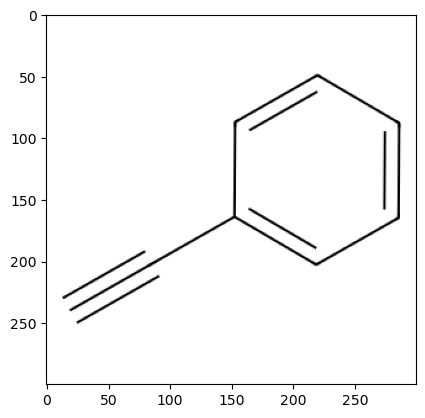

these are the predicted reactants corresponding the product with label 4laa,
CC(C)C(=O)C=S(C)(C)=O


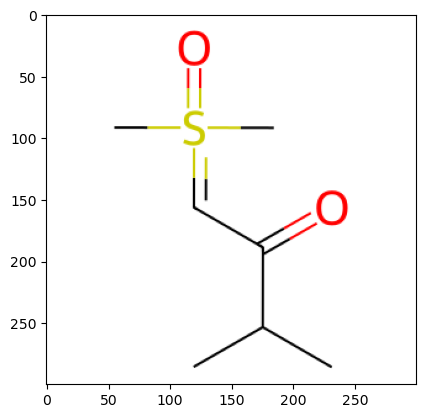

O=Nc1ccccc1


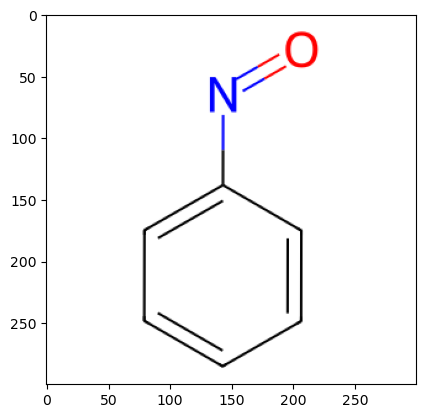

C#Cc1ccccc1


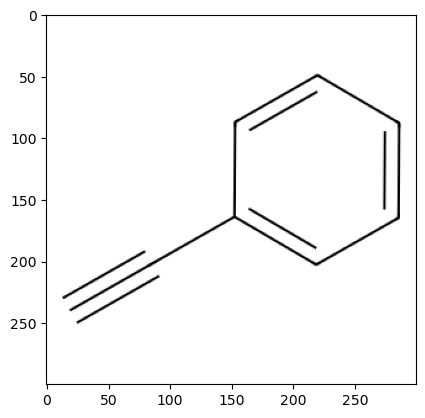

In [8]:
extracted_reactants = {}

for reactants, _, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

4a yes
4b 
4c no ?
4d yes
4e wrong molscribe
4f yes
4g yes
4h yes
4i yes
4j yes
4k yes
4l yes
4m yes

precision 10/13 recall 10/12